In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from mpl_toolkits.mplot3d import Axes3D
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cleaned_all_scaled = pd.read_csv('/content/drive/MyDrive/water_well_classification/data/X_train_resamp.csv')
cleaned_all_scaled['y'] = pd.read_csv('/content/drive/MyDrive/water_well_classification/data/y_train_resamp.csv')['functional_group']

df = cleaned_all_scaled.drop(columns=['Unnamed: 0'])

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type_group', 'y'],
      dtype='object')

# Plotting Functions

In [ ]:
def plot_groupby_counts(df, cols,ax,normalize=True):
  ''' 
  Groups the df by specified columns and counts the number of y values in each group.
  Creates a stacked bar plot of the y value counts.
  ''' 
  if isinstance(cols, str):
    unstack = 1
  else:
    unstack = 2

  grouped_quality = cleaned_all_scaled.groupby(cols)['y'].value_counts(normalize=normalize)
  ax = grouped_quality.unstack(unstack).plot.bar(stacked=True, ax=ax)
  ax.set_title(cols)
  return ax


def scatter_3d(df, x_ax, y_ax, z_ax):
  fig = plt.figure(figsize=(15,8))
  ax = Axes3D(fig)
  fig.add_axes(ax)

  colors = df['y'].map(dict(zip(('functional', 'non functional', 'functional needs repair'),('g','red','orange'))))

  sc = ax.scatter(lat_long_df[x_ax],  lat_long_df[y_ax], lat_long_df[z_ax], s=5, c=colors, marker='o', alpha=0.5)
  ax.set_xlabel(x_ax)
  ax.set_ylabel(y_ax)
  ax.set_zlabel(z_ax)
  return ax

def plot_dispatch(df
                ,columns
                ,nrows=1
                ,ncols=1
                ,res_path='/content/drive/MyDrive/water_well_classification/data/plots.png'
                ):
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(20,30))
  for ax, cols in zip(axes.flatten(), columns):
    plot_groupby_counts(df, cols,ax)
  plt.savefig(res_path)



In [ ]:
cat_cols = ['funder'
          ,'installer'
          ,'wpt_name'
          ,'basin'
          ,'subvillage'
          ,'region'
          ,'region_code'
          ,'district_code'
          ,'lga'
          ,'ward'
          ,'public_meeting'
          ,'scheme_management'
          ,'scheme_name'
          ,'permit'
          ,'construction_year'
          ,'extraction_type'
          ,'extraction_type_group'
          ,'extraction_type_class'
          ,'management'
          ,'management_group'
          ,'payment_type'
          ,'water_quality'
          ,'quality_group'
          ,'quantity'
          ,'quantity_group'
          ,'source'
          ,'source_type'
          ,'source_class'
          ,'waterpoint_type_group']
plot_dispatch(df, cat_cols,nrows=10, ncols=3)




extraction_type  extraction_type_group  y                      
afridev          afridev                functional                 1200
                                        non functional              722
                                        functional needs repair     212
                 gravity                non functional                1
                 india mark ii          non functional                3
                                                                   ... 
windmill         mono                   functional needs repair       7
                                        non functional                1
                 wind-powered           non functional               70
                                        functional                   50
                                        functional needs repair       7
Name: y, Length: 111, dtype: int64

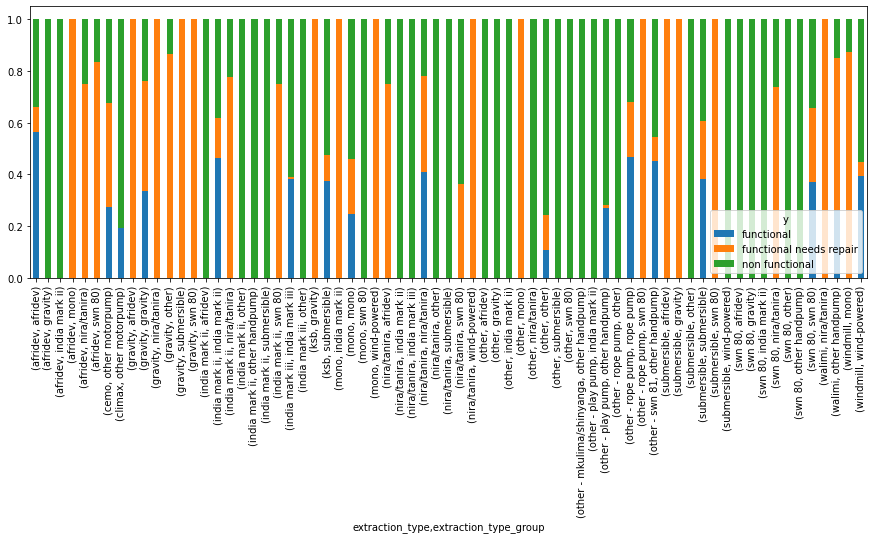

In [ ]:
grouped_quality = cleaned_all_scaled.groupby(['extraction_type', 'extraction_type_group'])['y'].value_counts(normalize=True)

grouped_quality.unstack(2).plot.bar(stacked=True, figsize=(15,5))

cleaned_all_scaled.groupby(['extraction_type', 'extraction_type_group'])['y'].value_counts()

In [ ]:
cat_cols = cleaned_all_scaled.select_dtypes(include='object').columns + ['public_meeting', 'permit']
plt.axes = plt.subplot(ncols=)
for col in cat_cols :


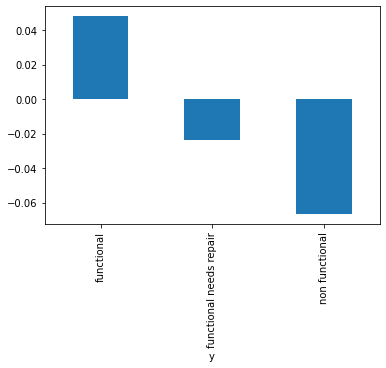

In [ ]:
cleaned_all_scaled.groupby('y')['amount_tsh'].mean().plot.bar(stacked=True)

In [ ]:
print(cleaned_all_scaled['amount_tsh'].min(), cleaned_all_scaled['amount_tsh'].max())

-0.1059700275597338 116.65607854749538


## Quality group
*   'missing' group could be an indicator of   non-functional wells
*   'flouride' is overwhelmingly present in 'functional' wells
*   'flouride', 'milky' and 'missing' are least likely to be found in 'functional needs repair' wells


could benefit from one hot encoding this column

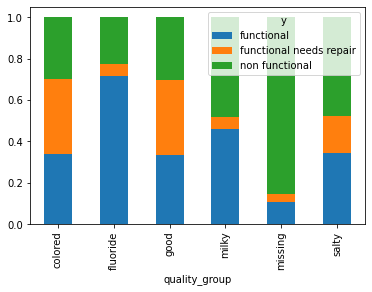

In [ ]:
grouped_quality = cleaned_all_scaled.groupby(['quality_group'])['y'].value_counts(normalize=True)
grouped_quality.unstack(1).plot.bar(stacked=True)

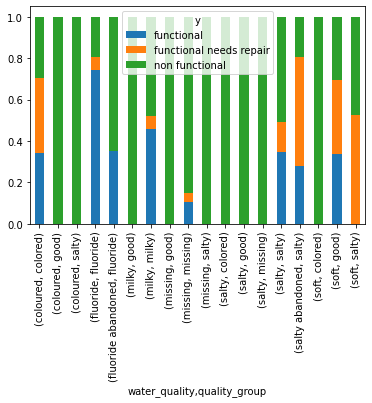

In [ ]:
grouped_quality = cleaned_all_scaled.groupby(['water_quality', 'quality_group'])['y'].value_counts(normalize=True)

grouped_quality.unstack(2).plot.bar(stacked=True)

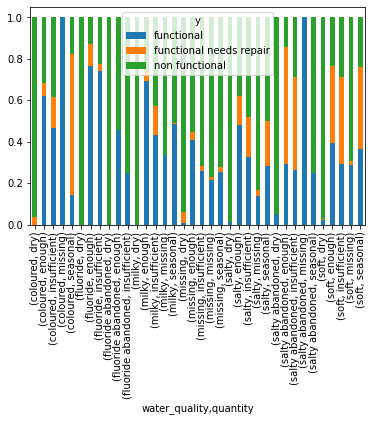

In [ ]:
grouped_quality = cleaned_all_scaled.groupby(['water_quality', 'quantity'])['y'].value_counts(normalize=True)

grouped_quality.unstack(2).plot.bar(stacked=True)

## Quantity 

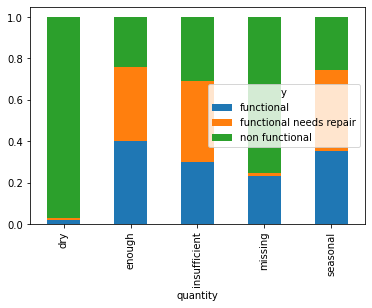

In [ ]:
grouped_quantity = cleaned_all_scaled.groupby(['quantity'])['y'].value_counts(normalize=True)
grouped_quantity.unstack(1).plot.bar(stacked=True)


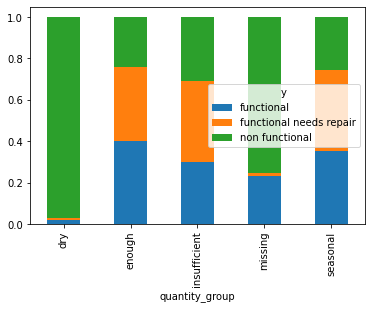

In [ ]:
grouped_quantity = cleaned_all_scaled.groupby(['quantity_group'])['y'].value_counts(normalize=True)
grouped_quantity.unstack(1).plot.bar(stacked=True)


## Source

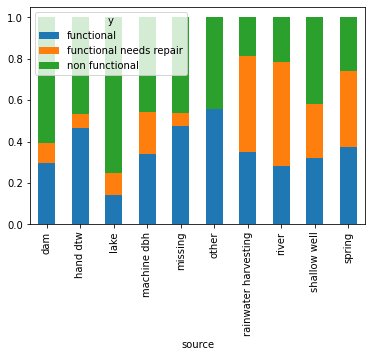

In [ ]:
grouped_source = cleaned_all_scaled.groupby(['source'])['y'].value_counts(normalize=True)
grouped_source.unstack(1).plot.bar(stacked=True)

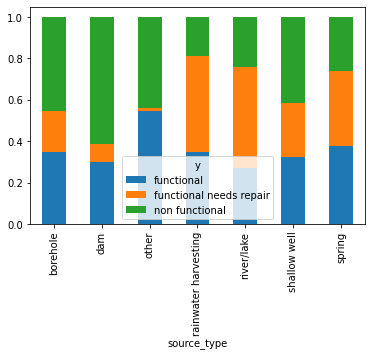

In [ ]:
grouped_source = cleaned_all_scaled.groupby(['source_type'])['y'].value_counts(normalize=True)
grouped_source.unstack(1).plot.bar(stacked=True)

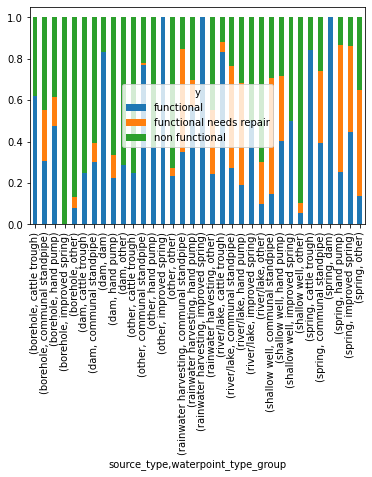

In [ ]:
grouped_source = cleaned_all_scaled.groupby(['source_type','waterpoint_type_group'])['y'].value_counts(normalize=True)
grouped_source.unstack(2).plot.bar(stacked=True)

## Extraction

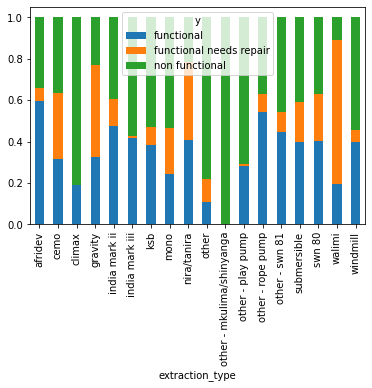

In [ ]:
grouped_extraction = cleaned_all_scaled.groupby(['extraction_type'])['y'].value_counts(normalize=True)
grouped_extraction.unstack(1).plot.bar(stacked=True)

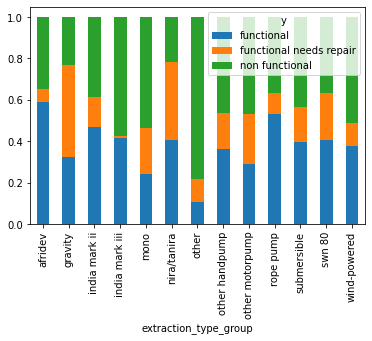

In [ ]:
grouped_extraction = cleaned_all_scaled.groupby(['extraction_type_group'])['y'].value_counts(normalize=True)
grouped_extraction.unstack(1).plot.bar(stacked=True)

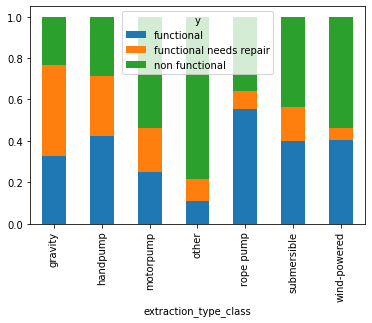

In [ ]:
grouped_extraction = cleaned_all_scaled.groupby(['extraction_type_class'])['y'].value_counts(normalize=True)
grouped_extraction.unstack(1).plot.bar(stacked=True)

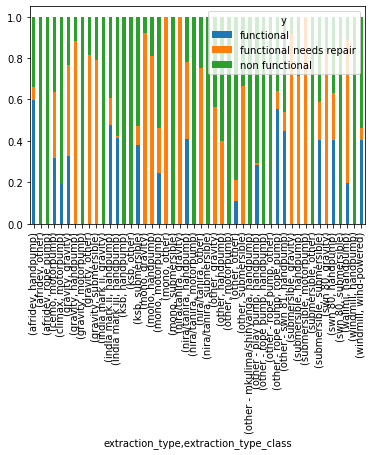

In [ ]:
grouped_extraction = cleaned_all_scaled.groupby(['extraction_type','extraction_type_class'])['y'].value_counts(normalize=True)
grouped_extraction.unstack(2).plot.bar(stacked=True)

## payment type

0.12889426206640006

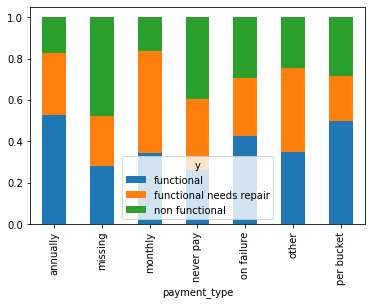

In [ ]:
grouped_extraction = cleaned_all_scaled.groupby(['payment_type'])['y'].value_counts(normalize=True)
grouped_extraction.unstack(1).plot.bar(stacked=True)
len(cleaned_all_scaled[cleaned_all_scaled['payment_type']=='missing'])/len(cleaned_all_scaled)

## Management
*   Massive class imbalance
*   could random sample and conduct post hoc



In [ ]:
cleaned_all_scaled['management'].value_counts()

vwc                 67090
wug                 11477
water board          5049
wua                  4098
parastatal           2747
private operator     2272
water authority      1276
other                1041
company               869
missing               631
other - school        137
trust                  90
Name: management, dtype: int64

0.006520144249150108

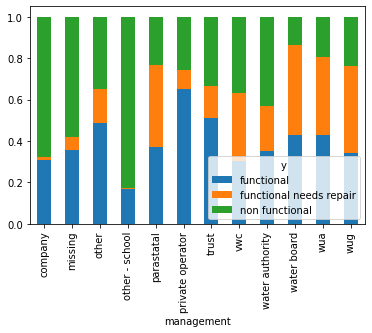

In [ ]:
management = cleaned_all_scaled.groupby('management')['y'].value_counts(normalize=True)
management.unstack(1).plot.bar(stacked=True)
len(cleaned_all_scaled[cleaned_all_scaled['management']=='missing'])/len(cleaned_all_scaled)

0.006416813912396541

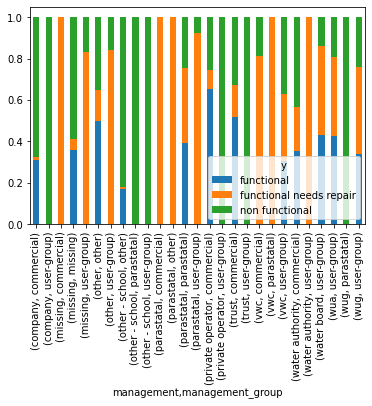

In [ ]:
management_group = cleaned_all_scaled.groupby(['management','management_group'])['y'].value_counts(normalize=True)
management_group.unstack(2).plot.bar(stacked=True)
len(cleaned_all_scaled[cleaned_all_scaled['management_group']=='missing'])/len(cleaned_all_scaled)

## funder

In [ ]:
funder = cleaned_all_scaled.groupby('funder')['y'].value_counts(normalize=True)
len(cleaned_all_scaled[cleaned_all_scaled['funder']=='missing'])/len(cleaned_all_scaled)

## world partner

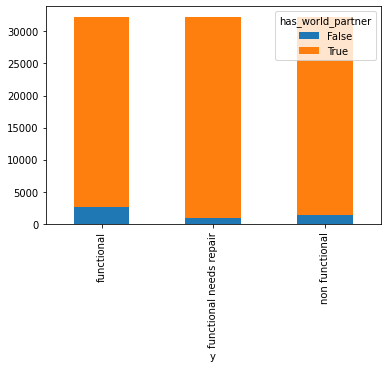

In [ ]:
cleaned_all_scaled.loc[cleaned_all_scaled['wpt_name'].str.startswith(("abass","abbass","abbas")), 'wpt_name'] = 'abass'
cleaned_all_scaled.loc[cleaned_all_scaled['wpt_name'].str.startswith(('zungu')), 'wpt_name'] = 'zunguni'

has_world_partner = cleaned_all_scaled.copy()
has_world_partner['has_world_partner'] = (has_world_partner['wpt_name'] != 'none') & (has_world_partner['wpt_name'] != 'missing')
has_world_partner['has_world_partner'] = pd.to_numeric(has_world_partner['has_world_partner'])
wpt_counts = has_world_partner.groupby('has_world_partner')['y'].value_counts()
wpt_counts.unstack(0).plot.bar(stacked=True)

## population

In [ ]:
bins = pd.interval_range(cleaned_all_scaled['population'].min()-.0001, cleaned_all_scaled['population'].max(),freq = 0.25)
cleaned_all_scaled['population_bins'] = pd.cut(cleaned_all_scaled['population'], bins, include_lowest=True,).astype(str, errors='ignore')
#cleaned_all_scaled.groupby('population_bins')['y'].value_counts()
cleaned_all_scaled[['population_bins','y']].value_counts().plot.bar()

## Year Constructed


*   ~37% of the year data is missing
> *  Pretty evenly spread throughout well conditions
*   As the year bins approach recency
> * The chance of the well being functional increases
> * The chance of the well being non functional decreases




In [ ]:
len(cleaned_all_scaled[cleaned_all_scaled['construction_year']==0])/len(cleaned_all_scaled)


0.36752534176508883

['nan' '2005.0-2008.0' '1996.0-1999.0' '2008.0-2011.0' '1981.0-1984.0'
 '1978.0-1981.0' '1999.0-2002.0' '1975.0-1978.0' '1972.0-1975.0'
 '1993.0-1996.0' '2002.0-2005.0' '1990.0-1993.0' '1966.0-1969.0'
 '1984.0-1987.0' '1987.0-1990.0' '1969.0-1972.0' '1963.0-1966.0']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

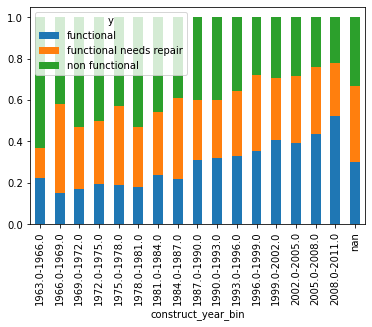

In [ ]:
year_df = cleaned_all_scaled[['construction_year','y']]

year_bins = pd.interval_range(1963,year_df['construction_year'].max(),freq=3)
year_df['construct_year_bin'] = pd.cut(year_df['construction_year'], year_bins)


labels = [f'{str(bin.left)}-{str(bin.right)}' for bin in year_bins]
year_df['construct_year_bin']  = year_df['construct_year_bin'].map(dict(zip(year_bins,labels))).astype(str, errors='ignore')
df.loc[year_df['construct_year_bin'].isna(), 'construct_year_bin'] = 'missing'

year_df.groupby('construct_year_bin')['y'].value_counts(normalize=True).unstack(1).plot.bar(stacked=True)